# Усложняем линейную регрессию

Для примера возьмем тот же саый набор данных с пролой пары

Загрузите набор данных sandler.csv - набор данных для предсказания дохода от показа фильмов.

Столбцы Date - дата премьеры, Title - название, Genre - жанр, Studio - студия Theaters - число кинотеатров, Opening Gross - доход от премьеры, Opening Theaters - число кинотеатров для премьеры, Gross - общий доход


In [ ]:
# библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# новые импорты
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/sandler.csv')
df.head()

,Date,Title,Genre,Studio,Theaters,Opening Gross,Opening Theaters,Gross
0,13.03.1992,Shakes the Clown,Comedy,IRS,9,$35 589,9,$115 103
1,23.07.1993,Coneheads,Comedy,Par.,1 978,$7 100 501,1 978,$21 274 717
2,05.08.1994,Airheads,Comedy,Fox,1 229,$1 911 739,1 228,$5 751 882
3,21.12.1994,Mixed Nuts,Comedy,Sony,1 318,$2 307 850,1 318,$6 821 850
4,10.02.1995,Billy Madison,Comedy,Uni.,1 887,$6 639 080,1 834,$25 588 734


In [ ]:
# сделайте предобработку - она уже прописана
df['Opening Theaters']=df['Opening Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Theaters']=df['Theaters'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Gross']=df['Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df['Opening Gross']=df['Opening Gross'].apply(lambda x: x.replace(' ','',10).replace("$",'',10))
df.drop(['Date','Title', 'Genre', 'Studio'], axis=1, inplace=True)
df['Opening Theaters'] = pd.to_numeric( df['Opening Theaters'])
df['Theaters'] = pd.to_numeric( df['Theaters'])
df['Gross'] = pd.to_numeric( df['Gross'])
df['Opening Gross'] = pd.to_numeric( df['Opening Gross'])
x, y = df.drop(["Gross"], axis = 1), df['Gross']


In [ ]:
df.head()

,Theaters,Opening Gross,Opening Theaters,Gross
0,9,35589,9,115103
1,1978,7100501,1978,21274717
2,1229,1911739,1228,5751882
3,1318,2307850,1318,6821850
4,1887,6639080,1834,25588734


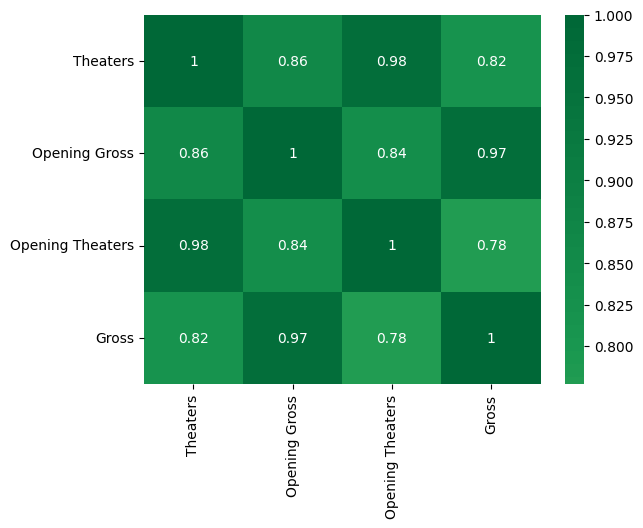

In [ ]:
sns.heatmap(df.corr(), cmap='RdYlGn', center=0, annot=True);
# вывод: коллинеарность

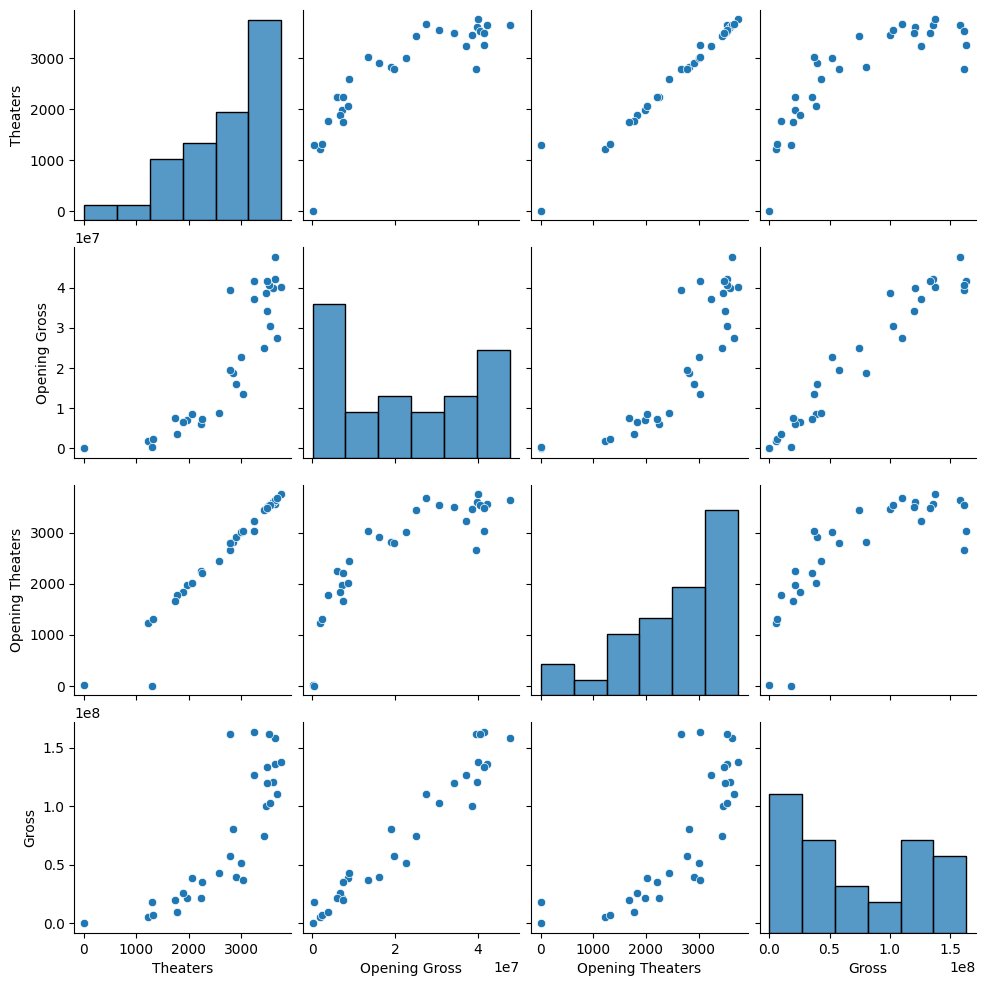

In [ ]:
sns.pairplot(df);
# вывод: для некоторых переменных кривая, возможно, подойдет больше прямой линии

# Регуляризация

In [ ]:
# вспомните с прошлой пары:
x = df[['Theaters', 'Opening Gross', 'Opening Theaters']] # добавили показатели
y = df['Gross']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
r_score = model.score(x,y)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared:', r_score)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 0.9454251075959061
Mean Absolute Error: 10258426.295135904
Mean Square Error: 184579982507500.53
Root Mean Square Error: 13586021.584978456


Можно ли как-то сохранить этот высокий R-квадрат, сделав поправку на коллианерность?

Регуляризация: изменение наклона линии путём ограничения весов модели, более высокое смещение корректируется за счет более низкой дисперсии (R в квадрате)

Мы должны добавить к функции потерь параметр регуляризации, который будет штрафовать модель за величину коэффициентов.
Чем больше параметр регуляризации, тем больше модель штрафуется за величину коэффициентов и их количество.
В хорошей модели у релевантных признаков, хорошо объясняющих зависимую переменную, должны быть коэффициенты больше, чем у незначимых признаков.

**Lasso** имеет более выраженную тенденцию к занулению коэффициентов (=избавлению от признаков). Она может быть полезна, если вы:
- Заведомо знаете, что не все признаки будут вам полезны;
- Имеете ограничения по скорости построения предсказаний, и вам выгодно избавляться от “лишних” признаков;
- Имеете выборку, где объектов меньше, чем признаков.

**Гребневая регрессия** не зануляет коэффициенты, а скорее старается уменьшить слишком большие (сильнее всего занижает веса для признаков с высокой корреляцией). Этот метод подходит, если вы уверены, что все ваши независимые переменные будут иметь эффект на независимую, пусть небольшой.

**Эластичная сеть** представляет собой комбинацию первых двух: может принести особую пользу в ситуациях, когда в данных необходимо одновременно выполнять отбор признаков и бороться с мультиколлинеарностью.


In [ ]:
sk_lasso_regression = Lasso()
sk_lasso_regression.fit(x_train, y_train)

sk_lasso_pred_res = sk_lasso_regression.predict(x_test)

Lasso_meanAbErr = metrics.mean_absolute_error(y_test, sk_lasso_pred_res)
Lasso_meanSqErr = metrics.mean_squared_error(y_test, sk_lasso_pred_res)
Lasso_r_score = metrics.r2_score(y_test, sk_lasso_pred_res)

print(f'Mean Square Error: {meanSqErr}')
print(f'Lasso Mean Square Error: {Lasso_meanSqErr}', '\n')

print(f'Mean Absolute Error: {meanAbErr}')
print(f'Lasso Mean Absolute Error: {Lasso_meanAbErr}', '\n')

print(f'R2 score: {r_score}')
print(f'Lasso R2 score: {Lasso_r_score}', '\n')

Mean Square Error: 184579982507500.53
Lasso Mean Square Error: 184579982502009.53 

Mean Absolute Error: 10258426.295135904
Lasso Mean Absolute Error: 10258426.295396645 

R2 score: 0.9454251075959061
Lasso R2 score: 0.9146146701458594 



In [ ]:
sk_ridge_regression = Ridge()
sk_ridge_regression.fit(x_train, y_train)

sk_ridge_pred_res = sk_ridge_regression.predict(x_test)

ridge_meanAbErr = metrics.mean_absolute_error(y_test, sk_ridge_pred_res)
ridge_meanSqErr = metrics.mean_squared_error(y_test, sk_ridge_pred_res)
ridge_r_score = metrics.r2_score(y_test, sk_ridge_pred_res)

print(f'Mean Square Error: {meanSqErr}')
print(f'Ridge Mean Square Error: {ridge_meanSqErr}', '\n')

print(f'Mean Absolute Error: {meanAbErr}')
print(f'Ridge Mean Absolute Error: {ridge_meanAbErr}', '\n')

print(f'R2 score: {r_score}')
print(f'Ridge R2 score: {ridge_r_score}', '\n')

Mean Square Error: 184579982507500.53
Ridge Mean Square Error: 184579978299306.6 

Mean Absolute Error: 10258426.295135904
Ridge Mean Absolute Error: 10258426.491305467 

R2 score: 0.9454251075959061
Ridge R2 score: 0.9146146720899986 



In [ ]:
sk_elastic_net_regression = ElasticNet()
sk_elastic_net_regression.fit(x_train, y_train)

sk_elastic_net_pred_res = sk_elastic_net_regression.predict(x_test)

EN_meanAbErr = metrics.mean_absolute_error(y_test, sk_elastic_net_pred_res)
EN_meanSqErr = metrics.mean_squared_error(y_test, sk_elastic_net_pred_res)
EN_r_score = metrics.r2_score(y_test, sk_elastic_net_pred_res)
print(f'Mean Square Error: {meanSqErr}')
print(f'Ridge Mean Square Error: {EN_meanSqErr}', '\n')

print(f'Mean Absolute Error: {meanAbErr}')
print(f'Ridge Mean Absolute Error: {EN_meanAbErr}', '\n')

print(f'R2 score: {r_score}')
print(f'Ridge R2 score: {EN_r_score}', '\n')

Mean Square Error: 184579982507500.53
Ridge Mean Square Error: 184579938319908.84 

Mean Absolute Error: 10258426.295135904
Ridge Mean Absolute Error: 10258428.355019758 

R2 score: 0.9454251075959061
Ridge R2 score: 0.9146146905841712 



# Полиномиальная регрессия

In [ ]:
# сначала линейная регрессия с прошлой пары
# функция линейной регрессии Y = a + bX

x = df['Theaters']
y = df["Gross"]
res = scipy.stats.linregress(x, y)
print(res)

LinregressResult(slope=47975.357278148185, intercept=-54573394.3301868, rvalue=0.8166224250384042, pvalue=2.1187568564055352e-08, stderr=6296.560273926145, intercept_stderr=17946703.010059427)


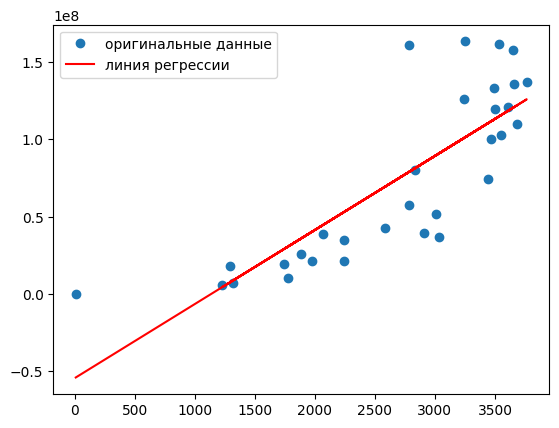

In [ ]:
# функция линейной регрессии Y = a + bX

plt.plot(x, y, 'o', label='оригинальные данные')
plt.plot(x, res.intercept + res.slope*x, 'r', label='линия регрессии')
plt.legend();
# intercept - число, которое мы прибавляем в уравнении
# slope - коэффициент для х

In [ ]:
print(f'R2 score: {(res.rvalue)**2}')

R2 score: 0.6668721850756041


В полиномиальной регрессии связь между независимой переменной x и зависимой переменной y моделируется как полином n-й степени от x.

Полиномиальная регрессия аналогична линейной регрессии, за исключением того, что в уравнении используются разные степени x (x, x², x³…), в отличие от линейной регрессии, в которой используется только x.



Документация: [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), [Polynomial and Spline interpolation¶](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py)

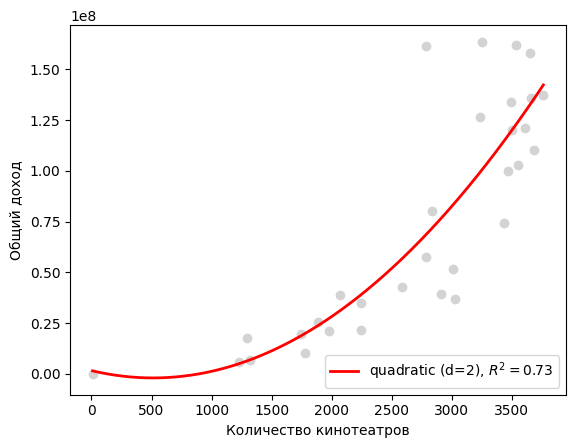

In [ ]:
X = df[['Theaters']].values
y = df['Gross'].values

regr = LinearRegression()

quadratic = PolynomialFeatures(degree=2) # степени
X_quad = quadratic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = metrics.r2_score(y, regr.predict(X_quad))


# plot results
plt.scatter(X, y, color='lightgray')

plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red',
         lw=2,
         linestyle='-')

plt.xlabel('Количество кинотеатров')
plt.ylabel('Общий доход')
plt.legend(loc='lower right');

Внимание, вопрос: стало лучше или хуже? Как понять, нужно ли искривлять линию дальше?

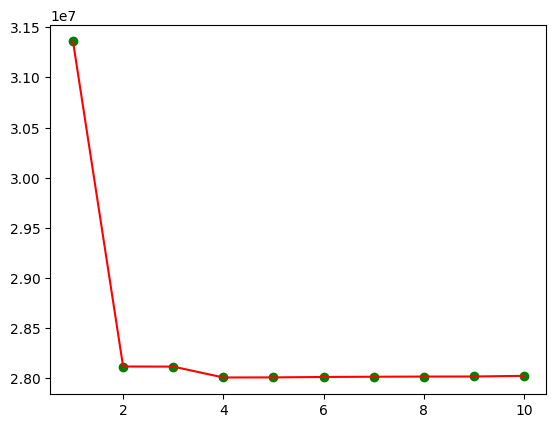

In [ ]:
# посмотрим на ошибки при увеличении степени
number_degrees = range(1, 11)
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)

   poly_x_values = poly_model.fit_transform(X)
   poly_model.fit(poly_x_values, y)

   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y)
   y_pred = regression_model.predict(poly_x_values)

   plt_mean_squared_error.append(metrics.mean_squared_error(y, y_pred, squared=False))

plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red")